In [4]:
%matplotlib inline
import matplotlib
# matplotlib.use('TkAgg')
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import zmq
import os
import time
import sys
import json

In [8]:
#initializing subscriber
host = '192.168.0.103'
port = 8358
url = 'tcp://'+host+':'+str(port)
context = zmq.Context()
socket = context.socket(zmq.SUB)
socket.connect(url)
socket.setsockopt(zmq.SUBSCRIBE, b'')

#samples to be collected 
numSamples = 3000

In [9]:
def getSamples(numSamples, socket):
    count = 0
    filtervals = np.zeros((numSamples,9))
    while count != numSamples:
        packet = socket.recv_json(0)
        ori = packet['normal']
        filtervals[count,:3] = np.array(json.loads(ori))
        
        kal = packet['kalman']
        filtervals[count,3:6] = np.array(json.loads(kal))
        
        madgwick = packet['madgwick']
        filtervals[count,6:] = np.array(json.loads(madgwick))
        
        count = count + 1
        if (count%100 == 0 and count != 0 ):
            print ("Recieved {0} samples of filter data".format(count))
    return filtervals

In [10]:
vals = getSamples(numSamples, socket)

Recieved 100 samples of mag data
Recieved 200 samples of mag data
Recieved 300 samples of mag data
Recieved 400 samples of mag data
Recieved 500 samples of mag data
Recieved 600 samples of mag data
Recieved 700 samples of mag data
Recieved 800 samples of mag data
Recieved 900 samples of mag data
Recieved 1000 samples of mag data
Recieved 1100 samples of mag data
Recieved 1200 samples of mag data
Recieved 1300 samples of mag data
Recieved 1400 samples of mag data
Recieved 1500 samples of mag data
Recieved 1600 samples of mag data
Recieved 1700 samples of mag data
Recieved 1800 samples of mag data
Recieved 1900 samples of mag data
Recieved 2000 samples of mag data
Recieved 2100 samples of mag data
Recieved 2200 samples of mag data
Recieved 2300 samples of mag data
Recieved 2400 samples of mag data
Recieved 2500 samples of mag data
Recieved 2600 samples of mag data
Recieved 2700 samples of mag data
Recieved 2800 samples of mag data
Recieved 2900 samples of mag data
Recieved 3000 samples o

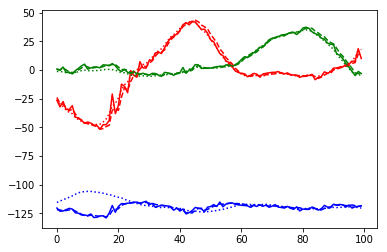

In [43]:
start = 1250
end = 1350
plt.plot(vals[start:end,0], color= 'red', label = 'normal')
plt.plot(vals[start:end,1], color= 'green', label = 'normal')
plt.plot(vals[start:end,2], color= 'blue', label = 'normal')
plt.plot(vals[start:end,3], color= 'red', linestyle='--', label = 'kalman')
plt.plot(vals[start:end,4], color= 'green', linestyle='--', label = 'kalman')
plt.plot(vals[start:end,5], color= 'blue', linestyle='--', label = 'kalman')
plt.plot(vals[start:end,6], color= 'red', linestyle=':', label = 'madgwick')
plt.plot(vals[start:end,7], color= 'green', linestyle=':', label = 'madgwick')
plt.plot(vals[start:end,8], color= 'blue', linestyle=':', label = 'madgwick')
# plt.legend(loc='best')